In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
# Step 1: Replace 'path_to_movie_csv' with the actual path to your "movie.csv" dataset
movie_csv_path = 'movies.csv'

# Step 2: Read the "movie.csv" file into a DataFrame
movie_df = pd.read_csv(movie_csv_path)

# Step 3: Calculate the profit for each movie using the formula (revenue - budget)
movie_df['profit'] = movie_df['revenue'] - movie_df['budget']

# Step 4: Display the DataFrame with the new "profit" column
movie_df[['title', 'budget', 'revenue', 'profit']].head(10)


,title,budget,revenue,profit
0,The Pope's Exorcist,18000000.0,6.567582e+07,4.767582e+07
1,Barbie,145000000.0,1.550000e+08,1.000000e+07
2,Transformers: Rise of the Beasts,200000000.0,4.070455e+08,2.070455e+08
3,Ant-Man and the Wasp: Quantumania,200000000.0,4.757662e+08,2.757662e+08
4,The Flash,190000000.0,2.674810e+08,7.748104e+07
5,Creed III,75000000.0,2.690000e+08,1.940000e+08
6,The Super Mario Bros. Movie,100000000.0,1.278767e+09,1.178767e+09
7,Fast X,340000000.0,6.992201e+08,3.592201e+08
8,John Wick: Chapter 4,90000000.0,4.317692e+08,3.417692e+08
9,Plane,25000000.0,5.100000e+07,2.600000e+07


In [126]:
def calculate_rating(row, min_votes, min_rating):
    vote_count = row['vote_count']
    vote_average = row['vote_average']

    weighted_average = (vote_count / (vote_count + min_votes)) * vote_average
    default_rating = (min_votes / (vote_count + min_votes)) * min_rating

    return weighted_average + default_rating

# Create a DataFrame from the sample data
movie_df = pd.DataFrame(movie_df)

# Set the minimum vote count and minimum rating (you can adjust these values as needed)
min_votes = 100
min_rating = 5.0

# Calculate the rating for each movie and add it as a new column
movie_df['rating'] = movie_df.apply(lambda row: calculate_rating(row, min_votes, min_rating), axis=1)

# Display the DataFrame with the new "rating" column
movie_df[['title', 'vote_count', 'vote_average', 'rating']].head(10)


,title,vote_count,vote_average,rating
0,The Pope's Exorcist,545.0,7.433,7.055791
1,Barbie,721.0,7.742,7.408017
2,Transformers: Rise of the Beasts,1007.0,7.340,7.128618
3,Ant-Man and the Wasp: Quantumania,2811.0,6.507,6.455231
4,The Flash,1872.0,6.936,6.837826
5,Creed III,1129.0,7.262,7.077948
6,The Super Mario Bros. Movie,4042.0,7.764,7.697269
7,Fast X,2437.0,7.346,7.253529
8,John Wick: Chapter 4,3039.0,7.904,7.811486
9,Plane,785.0,6.901,6.686198


In [127]:
movie_df.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,...,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations,profit,rating
0,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,...,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...,47675816.0,7.055791
1,346698,Barbie,Comedy-Adventure-Fantasy,en,Barbie and Ken are having the time of their li...,5675.527,LuckyChap Entertainment-Heyday Films-Mattel Films,2023-07-19,145000000.0,155000000.0,...,She's everything. He's just Ken.,7.742,721.0,Margot Robbie-Ryan Gosling-America Ferrera-Ari...,feminism-patriarchy-satire-based on toy-female...,/iuFNMS8U5cb6xfzi51Dbkovj7vM.jpg,/ctMserH8g2SeOAnCw5gFjdQF8mo.jpg,NaN,10000000.0,7.408017
2,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,407045464.0,...,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...,207045464.0,7.128618
3,640146,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,Super-Hero partners Scott Lang and Hope van Dy...,4425.387,Marvel Studios-Kevin Feige Productions,2023-02-15,200000000.0,475766228.0,...,Witness the beginning of a new dynasty.,6.507,2811.0,Paul Rudd-Evangeline Lilly-Jonathan Majors-Kat...,hero-ant-sequel-superhero-based on comic-famil...,/qnqGbB22YJ7dSs4o6M7exTpNxPz.jpg,/m8JTwHFwX7I7JY5fPe4SjqejWag.jpg,823999-676841-868759-734048-267805-965839-1033...,275766228.0,6.455231
4,298618,The Flash,Action-Adventure-Science Fiction,en,When his attempt to save his family inadverten...,4114.540,Warner Bros. Pictures-Double Dream-The Disco F...,2023-06-13,190000000.0,267481043.0,...,Worlds collide.,6.936,1872.0,Ezra Miller-Sasha Calle-Michael Keaton-Michael...,secret identity-hero-superhero-based on comic-...,/rktDFPbfHfUbArZ6OOOKsXcv0Bm.jpg,/yF1eOkaYvwiORauRCPWznV9xVvi.jpg,667538-114472-1075987-201304-346698-64503-6149...,77481043.0,6.837826


In [128]:
movie_df.shape

(722747, 22)

In [129]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722747 entries, 0 to 722746
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    722747 non-null  int64  
 1   title                 722743 non-null  object 
 2   genres                511955 non-null  object 
 3   original_language     722747 non-null  object 
 4   overview              604175 non-null  object 
 5   popularity            722747 non-null  float64
 6   production_companies  337180 non-null  object 
 7   release_date          670374 non-null  object 
 8   budget                722747 non-null  float64
 9   revenue               722747 non-null  float64
 10  runtime               688304 non-null  float64
 11  status                722747 non-null  object 
 12  tagline               108124 non-null  object 
 13  vote_average          722747 non-null  float64
 14  vote_count            722747 non-null  float64
 15  

In [130]:
movie_df.dropna(axis=0, inplace=True)
movie_df.isnull().sum()

id                      0
title                   0
genres                  0
original_language       0
overview                0
popularity              0
production_companies    0
release_date            0
budget                  0
revenue                 0
runtime                 0
status                  0
tagline                 0
vote_average            0
vote_count              0
credits                 0
keywords                0
poster_path             0
backdrop_path           0
recommendations         0
profit                  0
rating                  0
dtype: int64

In [131]:
movie_df.duplicated().sum()

0

In [132]:
movie_df['title'].duplicated().sum()

822

In [133]:
movie_df['release_date'].duplicated().sum()

5873

In [134]:
# Below are the quick examples

# Select duplicate rows except first occurrence based on all columns
df = movie_df[movie_df.duplicated()]

# Select duplicate row based on all columns
df = movie_df[movie_df.duplicated(keep=False)]

# Get duplicate last rows based on all columns
df = movie_df[movie_df.duplicated(keep = 'last')]

# Get list Of duplicate rows using single columns
df = movie_df[movie_df['title'].duplicated() == True]

# Get list of duplicate rows based on 'Courses' column
df = movie_df[movie_df.duplicated('title')]

# Get list Of duplicate rows using multiple columns
#df2 = df[df[['title', 'id','genres']].duplicated() == True]

# Get list of duplicate rows based on list of colu

In [135]:
import pandas as pd

def rank_movies_by_vote_average(movie_df):
    # Sort the DataFrame by the 'vote_average' column in descending order
    # If two movies have the same vote average, break the tie using the movie title in alphabetical order
    ranked_movies = movie_df.sort_values(by=['vote_count', 'title'], ascending=[False, True])
    ranked_movies['rank'] = range(1, len(ranked_movies) + 1)
    return ranked_movies

# Sample data
#data = pd.read_csv("movies.csv")

# Create a DataFrame from the sample data
movie_df = pd.DataFrame(df)

# Rank the movies based on vote_average
ranked_movies = rank_movies_by_vote_average(movie_df)

# Display only the top 30 movies with the highest vote average
top_30_movies = ranked_movies.head(30)
top_30_movies[['rank', 'title', 'vote_count', 'release_date']].head(30)

,rank,title,vote_count,release_date
1107,1,Beauty and the Beast,14505.0,2017-03-16
1400,2,Aladdin,9068.0,2019-05-22
335,3,The Lion King,9015.0,2019-07-12
2188,4,Fantastic Four,8447.0,2005-06-29
1450,5,Godzilla,8046.0,2014-05-14
3776,6,Ghostbusters,7819.0,1984-06-08
2169,7,The Jungle Book,7404.0,2016-04-07
419,8,The Little Mermaid,6864.0,1989-11-17
2157,9,The Mummy,6500.0,2017-06-06
752,10,Cinderella,6487.0,2015-03-12


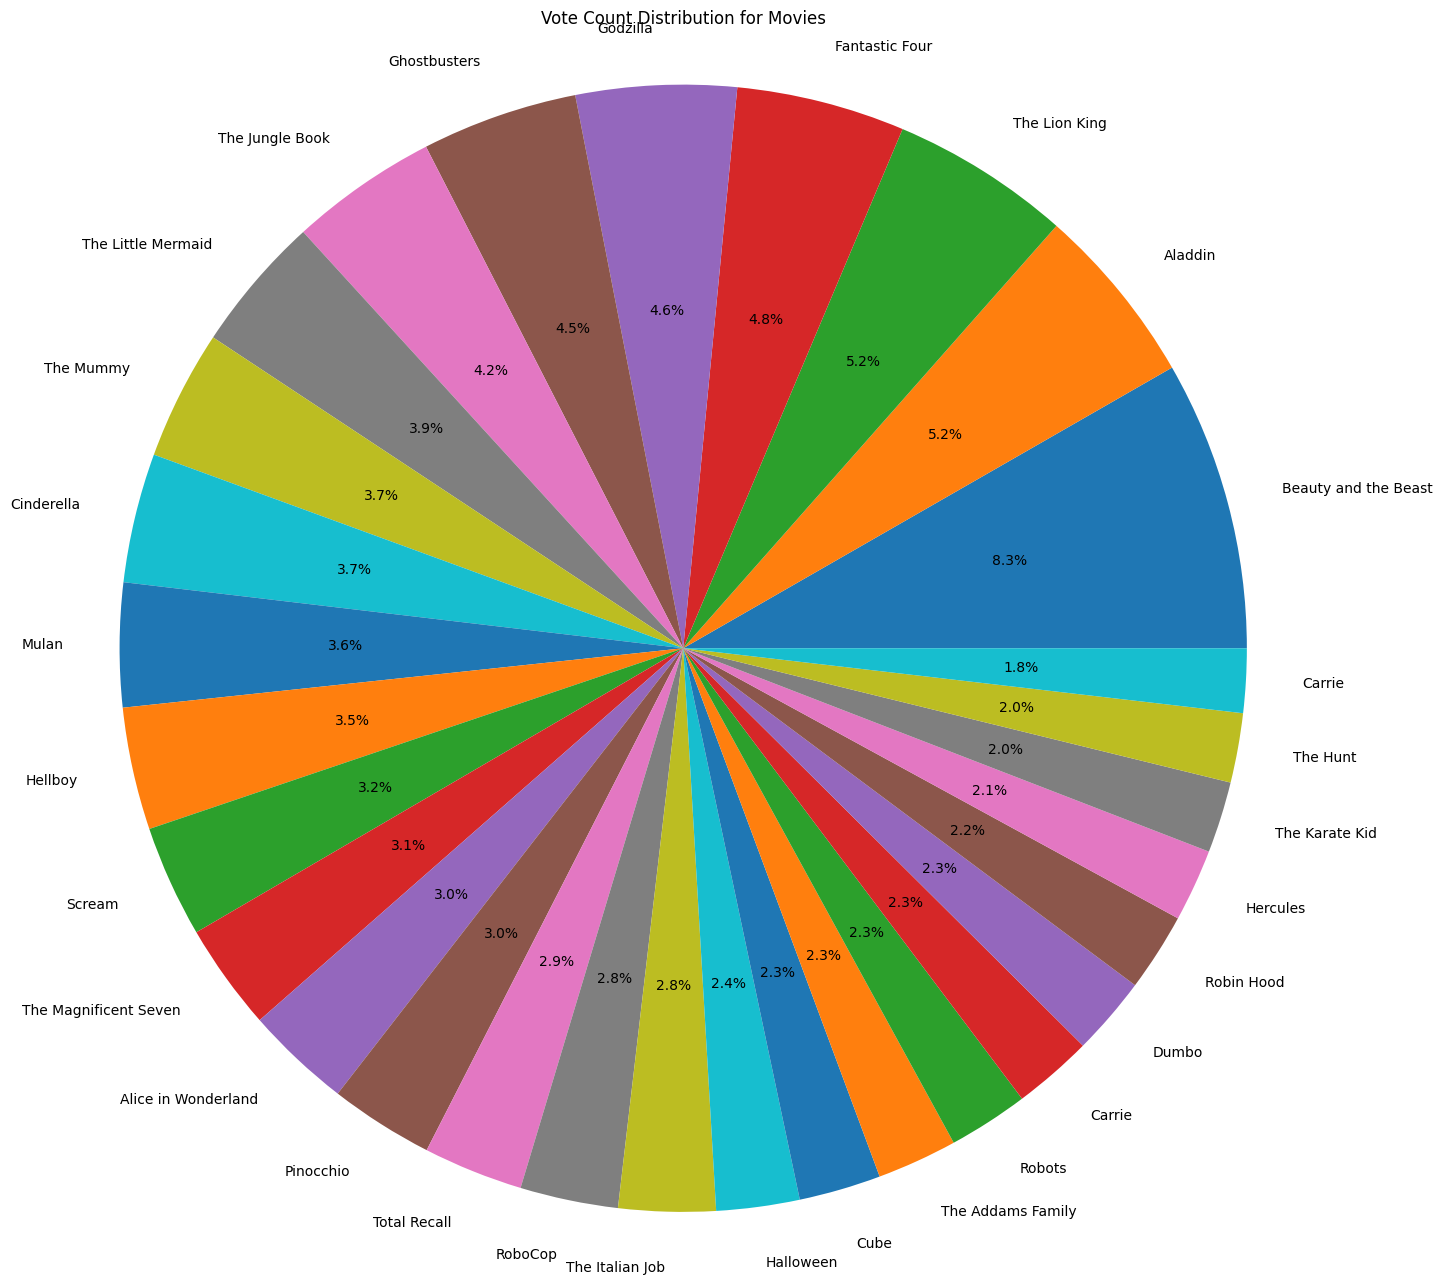

In [136]:
names = top_30_movies['title']
vote_counts = top_30_movies['vote_count']

plt.figure(figsize=(16, 16))
plt.pie(vote_counts, labels = names, autopct='%1.1f%%')
plt.title('Vote Count Distribution for Movies')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()    

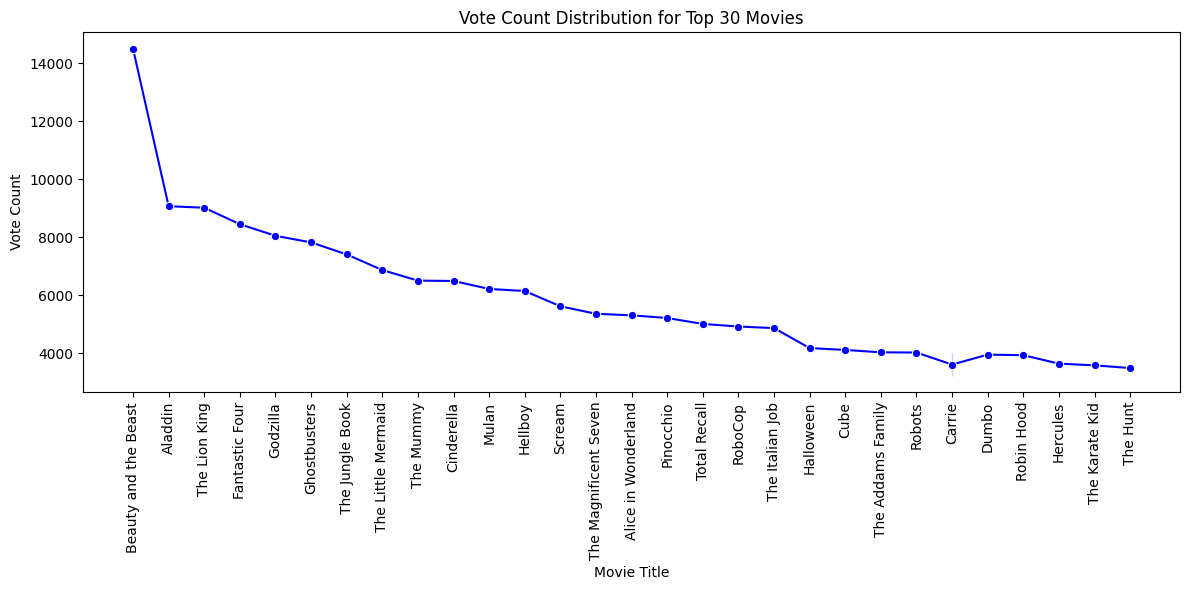

In [137]:
data = pd.DataFrame({'title': top_30_movies['title'], 'vote_count': top_30_movies['vote_count']})

plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='title', y='vote_count', marker='o', color='b')
plt.xticks(rotation=90)
plt.xlabel('Movie Title')
plt.ylabel('Vote Count')
plt.title('Vote Count Distribution for Top 30 Movies')
plt.tight_layout()
plt.show()

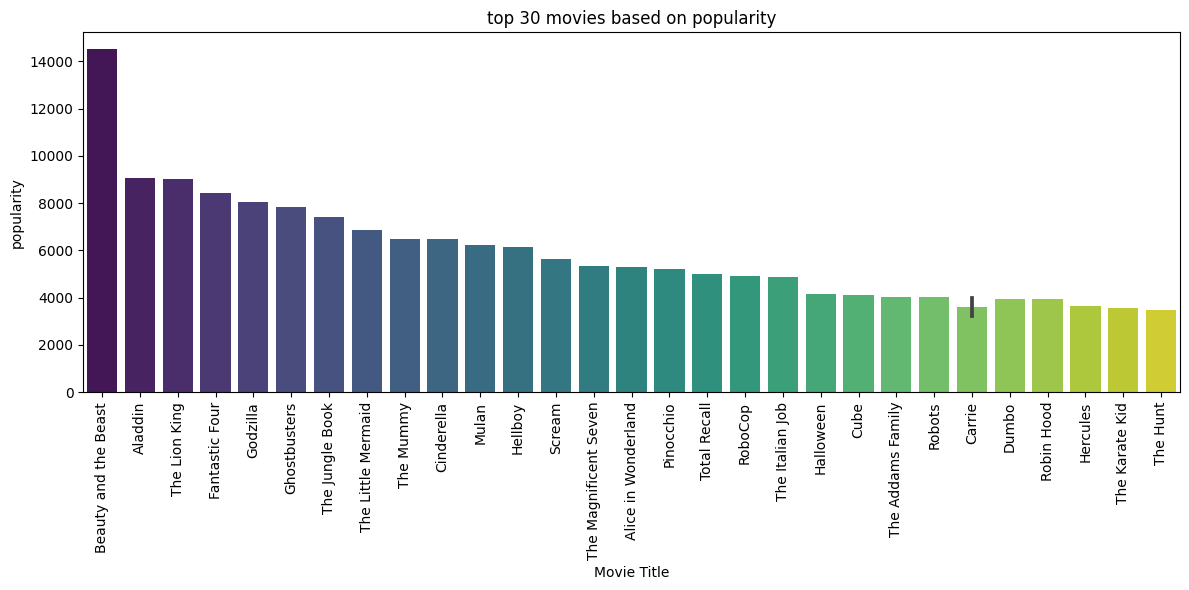

In [138]:
# Convert the data into a DataFrame
data = top_30_movies

plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='title', y='vote_count', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Movie Title')
plt.ylabel('popularity')
plt.title('top 30 movies based on popularity')
plt.tight_layout()
plt.show()


In [139]:
import pandas as pd

def rank_movies_by_vote_average(movie_df):
    # Sort the DataFrame by the 'vote_average' column in descending order
    # If two movies have the same vote average, break the tie using the movie title in alphabetical order
    ranked_movies = movie_df.sort_values(by=['profit', 'title'], ascending=[False, True])
    ranked_movies['rank'] = range(1, len(ranked_movies) + 1)
    return ranked_movies

# Sample data
#data = pd.read_csv("movies.csv")

# Create a DataFrame from the sample data
movie_df = pd.DataFrame(df)

# Rank the movies based on vote_average
ranked_movies = rank_movies_by_vote_average(movie_df)

# Display only the top 30 movies with the highest vote average
top_30_movies_profits = ranked_movies.head(30)
top_30_movies_profits[['rank', 'title', 'profit','release_date']].head(30)

,rank,title,profit,release_date
335,1,The Lion King,1.403075e+09,2019-07-12
1107,2,Beauty and the Beast,1.103521e+09,2017-03-16
1400,3,Aladdin,8.713040e+08,2019-05-22
2169,4,The Jungle Book,7.915506e+08,2016-04-07
752,5,Cinderella,4.485144e+08,2015-03-12
1450,6,Godzilla,3.690761e+08,2014-05-14
2157,7,The Mummy,2.842316e+08,2017-06-06
3776,8,Ghostbusters,2.661871e+08,1984-06-08
2379,9,Halloween,2.456149e+08,2018-10-18
2188,10,Fantastic Four,2.335359e+08,2005-06-29


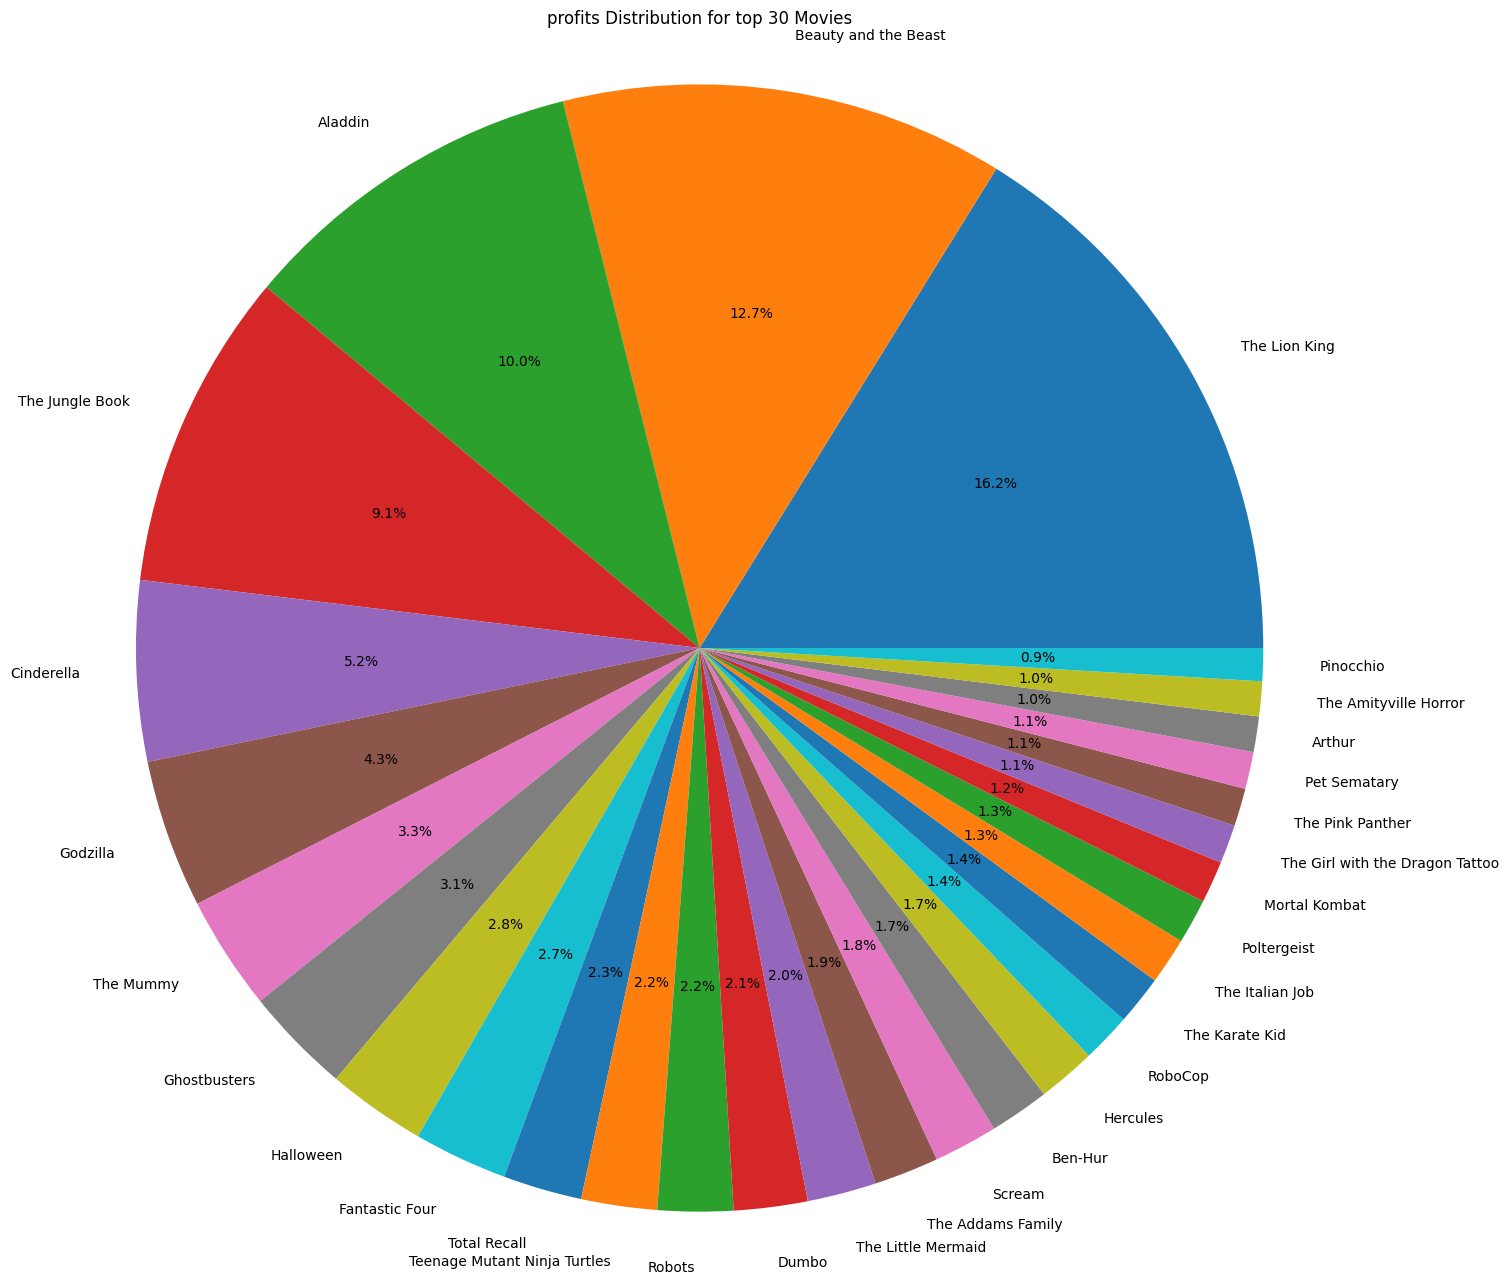

In [140]:
names = top_30_movies_profits['title']
profit = top_30_movies_profits['profit']

plt.figure(figsize=(16, 16))
plt.pie(profit, labels = names, autopct='%1.1f%%')
plt.title('profits Distribution for top 30 Movies')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()    

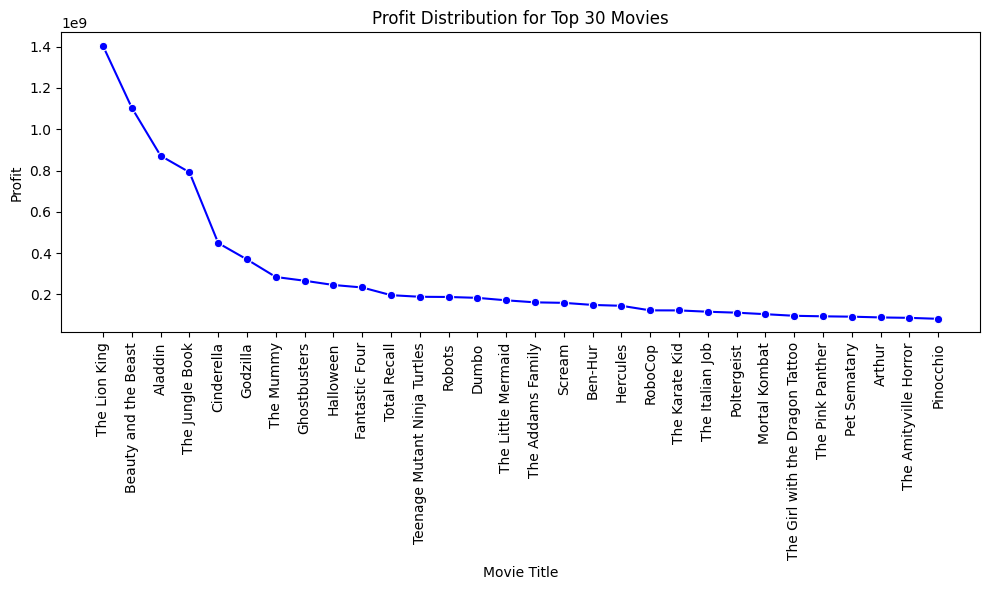

In [141]:
data = pd.DataFrame({'title': top_30_movies_profits['title'], 'profit': top_30_movies_profits['profit']})

plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='title', y='profit', marker='o', color='b')
plt.xticks(rotation=90)
plt.xlabel('Movie Title')
plt.ylabel('Profit')
plt.title('Profit Distribution for Top 30 Movies')
plt.tight_layout()
plt.show()

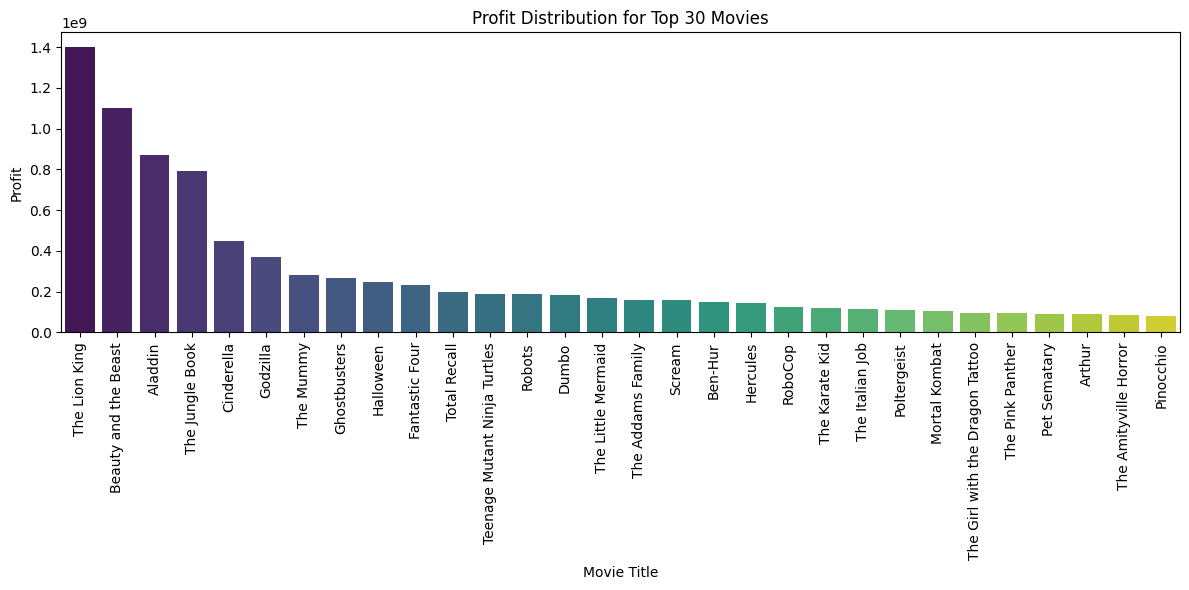

In [142]:
# Convert the data into a DataFrame
data = pd.DataFrame({'title': top_30_movies_profits['title'], 'profit': top_30_movies_profits['profit']})

plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='title', y='profit', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Movie Title')
plt.ylabel('Profit')
plt.title('Profit Distribution for Top 30 Movies')
plt.tight_layout()
plt.show()

In [143]:
import pandas as pd

def rank_movies_by_vote_average(movie_df):
    # Sort the DataFrame by the 'vote_average' column in descending order
    # If two movies have the same vote average, break the tie using the movie title in alphabetical order
    ranked_movies = movie_df.sort_values(by=['rating', 'title'], ascending=[False, True])
    ranked_movies['rank'] = range(1, len(ranked_movies) + 1)
    return ranked_movies

# Sample data
#data = pd.read_csv("movies.csv")

# Create a DataFrame from the sample data
movie_df = pd.DataFrame(df)

# Rank the movies based on vote_average
ranked_movies = rank_movies_by_vote_average(movie_df)

# Display only the top 30 movies with the highest vote average
top_30_movies_ratings = ranked_movies.head(30)
top_30_movies_ratings[['rank', 'title', 'rating', 'release_date']].head(30)

,rank,title,rating,release_date
8355,1,Metropolis,8.064636,1927-02-06
8548,2,The Kid,8.039126,1921-01-21
5256,3,The Hunt,8.013432,2012-10-25
3456,4,Ghost in the Shell,7.835643,1995-11-18
8495,5,Papillon,7.731101,1973-12-13
3275,6,Ben-Hur,7.682155,1959-11-18
15723,7,The Postman,7.624858,1994-04-07
13372,8,Notorious,7.585063,1946-08-21
5626,9,Freaks,7.564871,1932-02-12
2931,10,Planet of the Apes,7.553253,1968-02-07


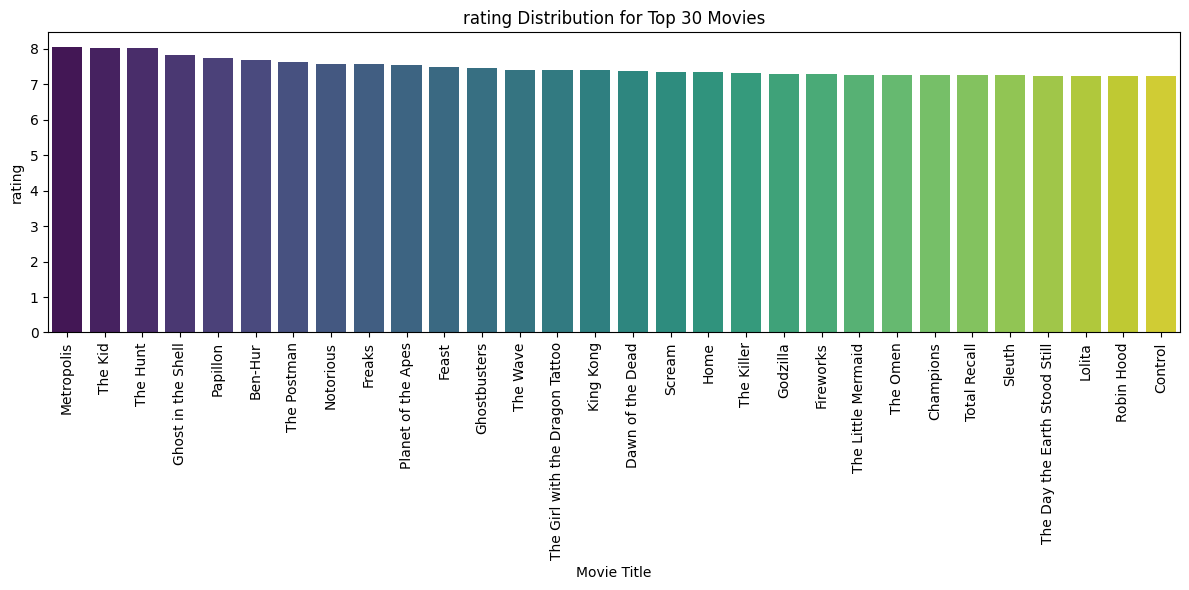

In [144]:
# Convert the data into a DataFrame
data = pd.DataFrame({'title': top_30_movies_ratings['title'], 'rating': top_30_movies_ratings['rating']})

plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='title', y='rating', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Movie Title')
plt.ylabel('rating')
plt.title('rating Distribution for Top 30 Movies')
plt.tight_layout()
plt.show()

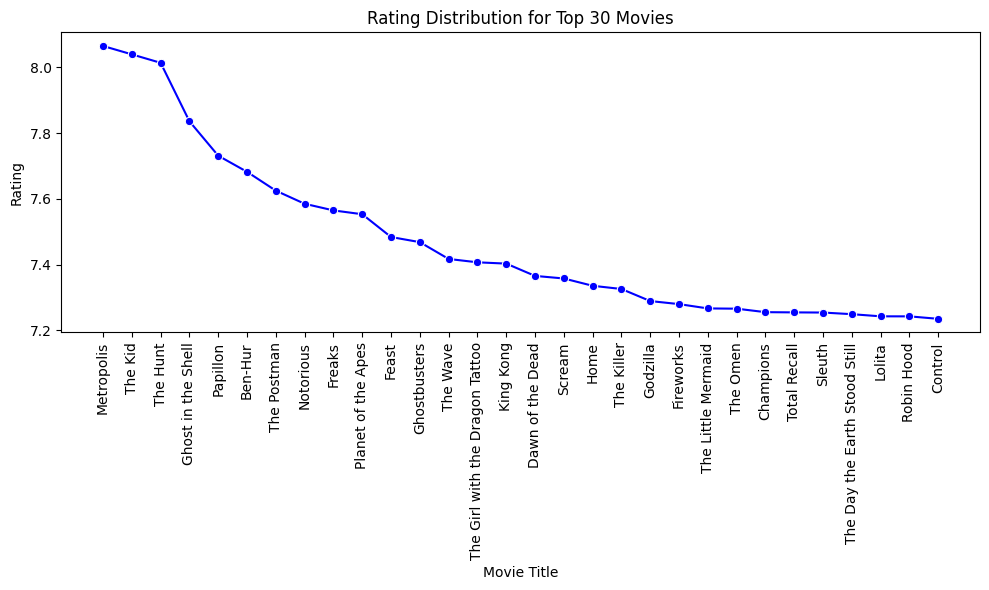

In [145]:
data = pd.DataFrame({'title': top_30_movies_ratings['title'], 'rating': top_30_movies_ratings['rating']})

plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='title', y='rating', marker='o', color='b')
plt.xticks(rotation=90)
plt.xlabel('Movie Title')
plt.ylabel('Rating')
plt.title('Rating Distribution for Top 30 Movies')
plt.tight_layout()
plt.show()

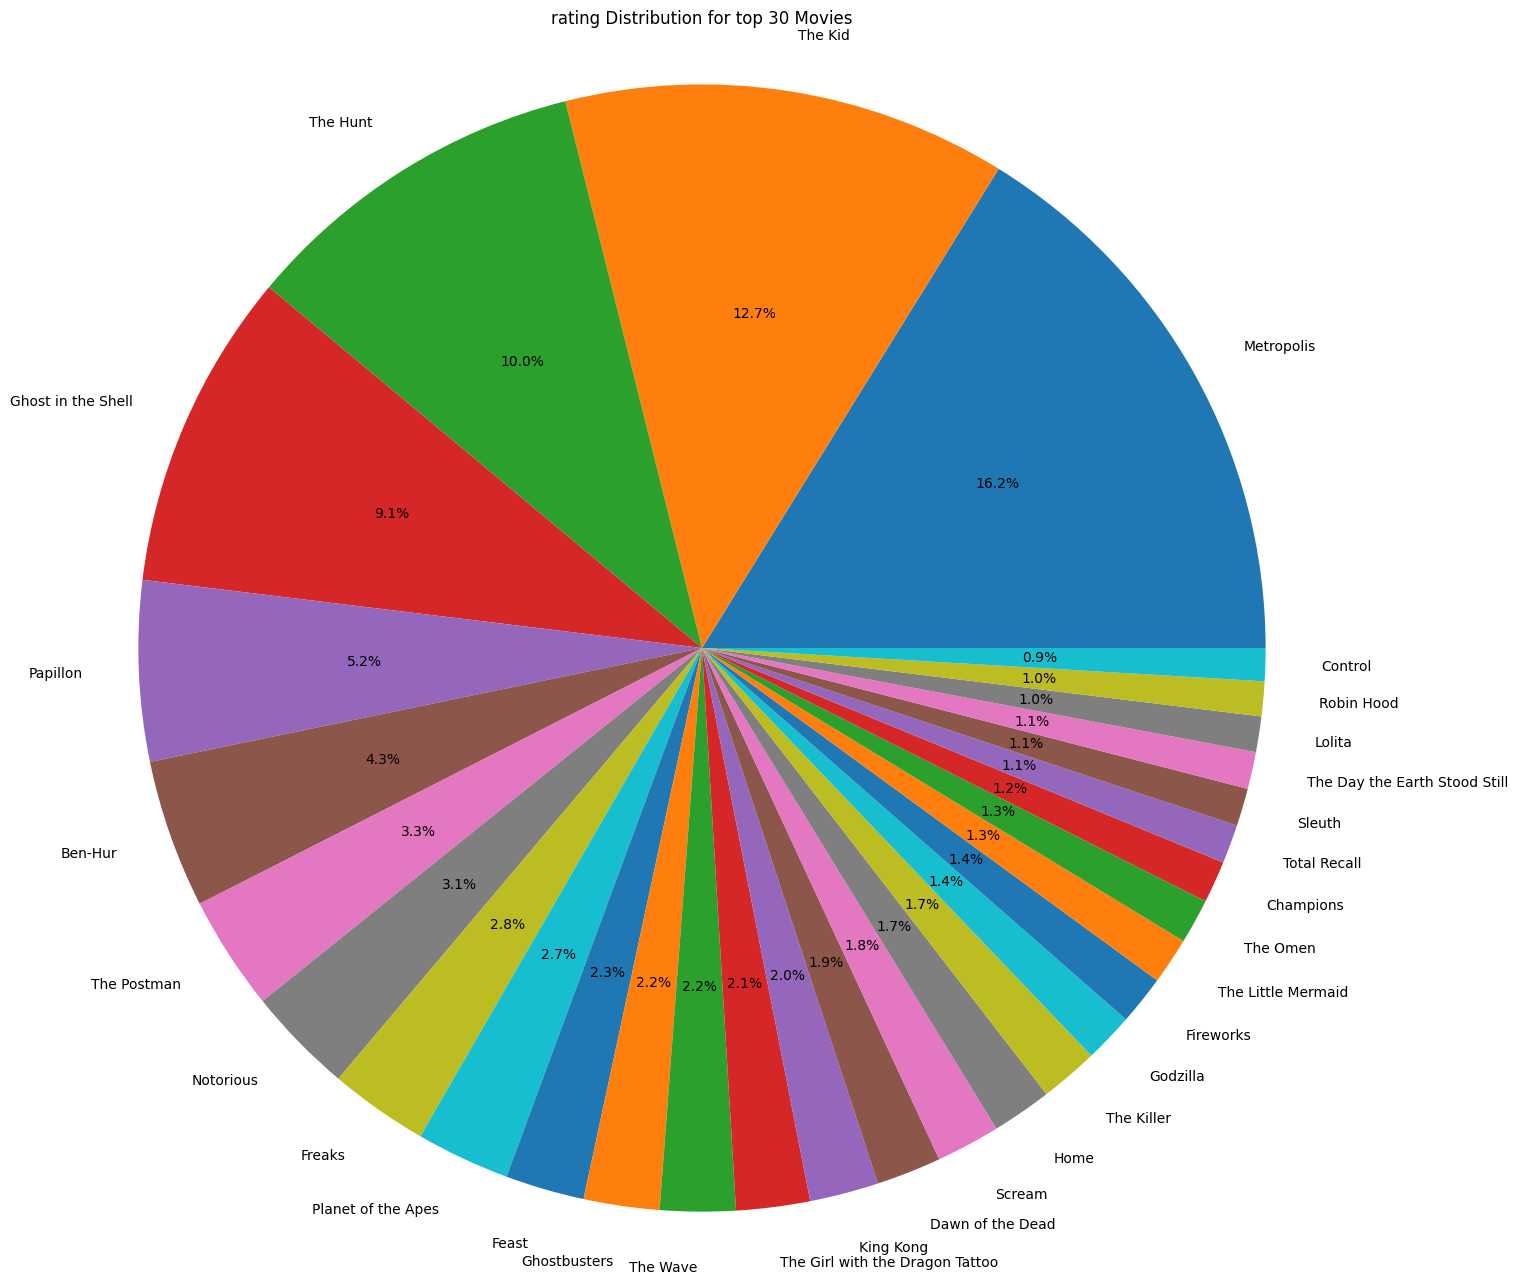

In [146]:
names = top_30_movies_ratings['title']
rating = top_30_movies_ratings['rating']

plt.figure(figsize=(16, 16))
plt.pie(profit, labels = names, autopct='%1.1f%%')
plt.title('rating Distribution for top 30 Movies')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()    